In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import json 

from json import load
from dataset import get_cliffs, split_data
from graphics import get_hist_prop

In [49]:
# Load target sequences and drugs from respective JSON files
targets = load(open('../data/KIBA/target_seq.txt'))
drugs = load(open('../data/KIBA/SMILES.txt'))

# Load drug-target affinity data from a CSV file into a DataFrame
affinity = pd.read_csv('../data/KIBA/affinity.txt', sep='\\t', header=None)

C:\Users\rena_\AppData\Local\Temp\ipykernel_7996\1071944785.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  affinity = pd.read_csv('../data/KIBA/affinity.txt', sep='\\t', header=None)


In [52]:
# Map drug ids to indices (rows) and target ids to columns
affinity.index = drugs
affinity.columns = targets

In [53]:
unpivoted = affinity.stack().reset_index()
unpivoted.columns = ['drug', 'target', 'affinity']
unpivoted['SMILES'] = unpivoted.drug.apply(drugs.get)

In [54]:
unpivoted

,drug,target,affinity,SMILES
0,CHEMBL1087421,O00141,11.10000,COC1=C(C=C2C(=C1)CCN=C2C3=CC(=C(C=C3)Cl)Cl)Cl
1,CHEMBL1087421,O14920,11.10000,COC1=C(C=C2C(=C1)CCN=C2C3=CC(=C(C=C3)Cl)Cl)Cl
2,CHEMBL1087421,O15111,11.10000,COC1=C(C=C2C(=C1)CCN=C2C3=CC(=C(C=C3)Cl)Cl)Cl
3,CHEMBL1087421,P00533,11.10000,COC1=C(C=C2C(=C1)CCN=C2C3=CC(=C(C=C3)Cl)Cl)Cl
4,CHEMBL1087421,P04626,11.10000,COC1=C(C=C2C(=C1)CCN=C2C3=CC(=C(C=C3)Cl)Cl)Cl
...,...,...,...,...
118249,CHEMBL230654,Q13554,10.49794,CCCC1=C(NC=N1)CNC2=CC(=C3C(=C2)C(=C(C=N3)C#N)N...
118250,CHEMBL230654,Q13555,10.49794,CCCC1=C(NC=N1)CNC2=CC(=C3C(=C2)C(=C(C=N3)C#N)N...
118251,CHEMBL230654,Q13557,10.49794,CCCC1=C(NC=N1)CNC2=CC(=C3C(=C2)C(=C(C=N3)C#N)N...
118252,CHEMBL230654,Q16539,10.49794,CCCC1=C(NC=N1)CNC2=CC(=C3C(=C2)C(=C(C=N3)C#N)N...


In [55]:
unpivoted.to_csv('../analysis/kiba_d_t_affinity.csv')
# unpivoted = pd.read_csv('../analysis/kiba_d_t_affinity.csv')

In [81]:
cliff_pairs = get_cliffs(unpivoted, threshold_affinity=1, threshold_similarity=0.9)

100%|██████████| 15/15 [00:00<00:00, 15033.35it/s]


In [84]:
cliff_pairs

,drug1,drug2,cliff,target,smiles1,smiles2
0,CHEMBL1087421,CHEMBL1088633,0,O00141,COC1=C(C=C2C(=C1)CCN=C2C3=CC(=C(C=C3)Cl)Cl)Cl,COC1=C(C=C2C(=C1)CCN=C2C3=CC(=CC=C3)Cl)Cl
1,CHEMBL206783,CHEMBL207037,0,O00141,COC1=C(C=C2C(=C1)N=CN=C2NC3=C(C(=CC=C3)Cl)F)CN...,COC1=C(C=C2C(=C1)N=CN=C2NC3=C(C(=CC=C3)Cl)F)CN...
2,CHEMBL206783,CHEMBL207246,0,O00141,COC1=C(C=C2C(=C1)N=CN=C2NC3=C(C(=CC=C3)Cl)F)CN...,COC1=C(C=C2C(=C1)N=CN=C2NC3=C(C(=CC=C3)Cl)F)CN...
3,CHEMBL206783,CHEMBL207584,0,O00141,COC1=C(C=C2C(=C1)N=CN=C2NC3=C(C(=CC=C3)Cl)F)CN...,COC1=C(C=C2C(=C1)N=CN=C2NC3=C(C(=CC=C3)Cl)F)CN...
4,CHEMBL206783,CHEMBL207674,0,O00141,COC1=C(C=C2C(=C1)N=CN=C2NC3=C(C(=CC=C3)Cl)F)CN...,COC1=C(C=C2C(=C1)N=CN=C2NC3=C(C(=CC=C3)Cl)F)CN...
...,...,...,...,...,...,...
80512,CHEMBL456936,CHEMBL517956,0,Q16512,CC1=C(C=C(C=C1)O)CCC2C3CCC(C3(CCC2=O)C)C(C)CCC...,CC1=C(C=C(C=C1)O)CCC2C3CCC(C3(CCC2O)C)C(C)CCCC...
80513,CHEMBL456936,CHEMBL518060,0,Q16512,CC1=C(C=C(C=C1)O)CCC2C3CCC(C3(CCC2=O)C)C(C)CCC...,CC1=C(C=C(C=C1)O)CCC2C3CCC(C3(CCC2=O)C)C(C)C=C...
80514,CHEMBL515982,CHEMBL517956,0,Q16512,CC1=C(C=C(C=C1)O)CCC2C3CCC(C3(CCC2O)C)C(C)CCC(...,CC1=C(C=C(C=C1)O)CCC2C3CCC(C3(CCC2O)C)C(C)CCCC...
80515,CHEMBL515982,CHEMBL518060,0,Q16512,CC1=C(C=C(C=C1)O)CCC2C3CCC(C3(CCC2O)C)C(C)CCC(...,CC1=C(C=C(C=C1)O)CCC2C3CCC(C3(CCC2=O)C)C(C)C=C...


In [ ]:
cliff_pairs.to_csv('../analysis/kiba_cliff_pairs_ta1_ts0.9.csv', index=False)

# Visualization

In [57]:
cliff_pairs = pd.read_csv('../analysis/kiba_cliff_pairs_ta1_ts0.9.csv')

In [86]:
cliff_pivot = cliff_pairs.pivot_table(index=['drug1', 'drug2'], columns='cliff', aggfunc='size', fill_value=0)
cliff_pivot

cliff                       0   1
drug1        drug2               
CHEMBL100102 CHEMBL327291  14   0
             CHEMBL95737   14   0
             CHEMBL97026   14   0
             CHEMBL97448   14   0
             CHEMBL97768   14   0
...                        ..  ..
CHEMBL97448  CHEMBL97768    3  11
             CHEMBL97796   14   0
CHEMBL97768  CHEMBL97796    3  11
CHEMBL98721  CHEMBL99572   11   3
CHEMBL99743  CHEMBL104067  23   1

[2627 rows x 2 columns]

In [60]:
cliff_pivot['total_count'] = cliff_pivot[0] + cliff_pivot[1]

# Calculate the proportion of 1s in pairs
cliff_pivot['proportion_of_1'] = cliff_pivot[1] / cliff_pivot['total_count']
cliff_pivot

cliff                       0   1  total_count  proportion_of_1
drug1        drug2                                             
CHEMBL100102 CHEMBL327291  14   0           14         0.000000
             CHEMBL95737   14   0           14         0.000000
             CHEMBL97026   14   0           14         0.000000
             CHEMBL97448   14   0           14         0.000000
             CHEMBL97768   14   0           14         0.000000
...                        ..  ..          ...              ...
CHEMBL97448  CHEMBL97768    3  11           14         0.785714
             CHEMBL97796   14   0           14         0.000000
CHEMBL97768  CHEMBL97796    3  11           14         0.785714
CHEMBL98721  CHEMBL99572   11   3           14         0.214286
CHEMBL99743  CHEMBL104067  23   1           24         0.041667

[2627 rows x 4 columns]

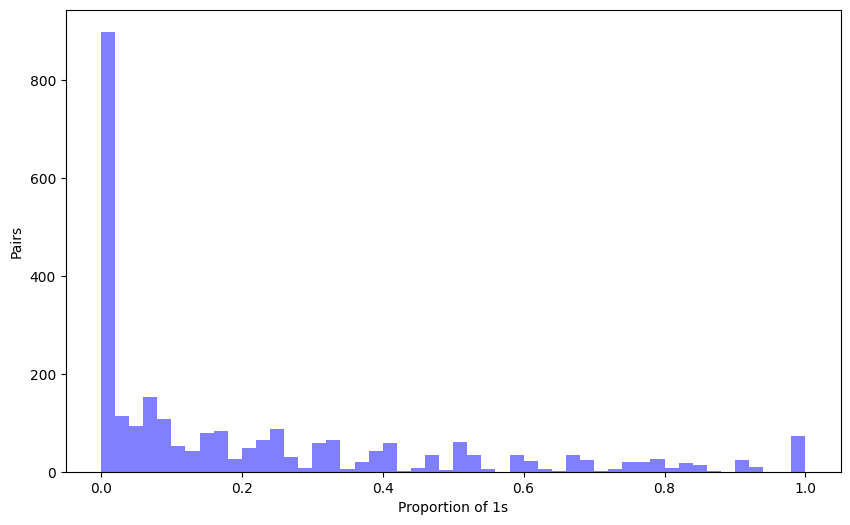

In [63]:
cliff_pivot_reset = cliff_pivot.reset_index()

plt.figure(figsize=(10, 6))
plt.hist(cliff_pivot_reset['proportion_of_1'].to_numpy(), color='blue', alpha=0.5, bins=50)
plt.xlabel('Proportion of 1s')
plt.ylabel('Pairs');

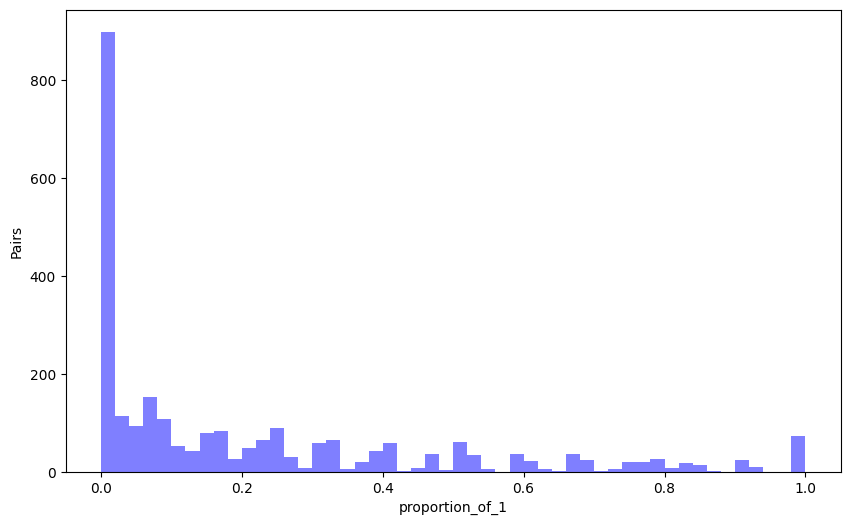

In [66]:
get_hist_prop(cliff_pivot, 'proportion_of_1')

In [67]:
len(cliff_pivot_reset), len(cliff_pivot_reset[cliff_pivot_reset['proportion_of_1'] == 0]), len(cliff_pivot_reset[cliff_pivot_reset['proportion_of_1'] == 1])

(2627, 795, 72)

In [68]:
len(cliff_pivot_reset[(cliff_pivot_reset['proportion_of_1'] != 0) & (cliff_pivot_reset['proportion_of_1'] != 1)])

1760

# Split data

Out of 2627 drug pairs, 795 do not exhibit ACs (as it was expected) and 72 pairs does show AC exclusively. Moreover, there exists 1760 of compounds that demonstrate both non-AC and AC.


In [87]:
cliff_pairs

,drug1,drug2,cliff,target,smiles1,smiles2
0,CHEMBL1087421,CHEMBL1088633,0,O00141,COC1=C(C=C2C(=C1)CCN=C2C3=CC(=C(C=C3)Cl)Cl)Cl,COC1=C(C=C2C(=C1)CCN=C2C3=CC(=CC=C3)Cl)Cl
1,CHEMBL206783,CHEMBL207037,0,O00141,COC1=C(C=C2C(=C1)N=CN=C2NC3=C(C(=CC=C3)Cl)F)CN...,COC1=C(C=C2C(=C1)N=CN=C2NC3=C(C(=CC=C3)Cl)F)CN...
2,CHEMBL206783,CHEMBL207246,0,O00141,COC1=C(C=C2C(=C1)N=CN=C2NC3=C(C(=CC=C3)Cl)F)CN...,COC1=C(C=C2C(=C1)N=CN=C2NC3=C(C(=CC=C3)Cl)F)CN...
3,CHEMBL206783,CHEMBL207584,0,O00141,COC1=C(C=C2C(=C1)N=CN=C2NC3=C(C(=CC=C3)Cl)F)CN...,COC1=C(C=C2C(=C1)N=CN=C2NC3=C(C(=CC=C3)Cl)F)CN...
4,CHEMBL206783,CHEMBL207674,0,O00141,COC1=C(C=C2C(=C1)N=CN=C2NC3=C(C(=CC=C3)Cl)F)CN...,COC1=C(C=C2C(=C1)N=CN=C2NC3=C(C(=CC=C3)Cl)F)CN...
...,...,...,...,...,...,...
80512,CHEMBL456936,CHEMBL517956,0,Q16512,CC1=C(C=C(C=C1)O)CCC2C3CCC(C3(CCC2=O)C)C(C)CCC...,CC1=C(C=C(C=C1)O)CCC2C3CCC(C3(CCC2O)C)C(C)CCCC...
80513,CHEMBL456936,CHEMBL518060,0,Q16512,CC1=C(C=C(C=C1)O)CCC2C3CCC(C3(CCC2=O)C)C(C)CCC...,CC1=C(C=C(C=C1)O)CCC2C3CCC(C3(CCC2=O)C)C(C)C=C...
80514,CHEMBL515982,CHEMBL517956,0,Q16512,CC1=C(C=C(C=C1)O)CCC2C3CCC(C3(CCC2O)C)C(C)CCC(...,CC1=C(C=C(C=C1)O)CCC2C3CCC(C3(CCC2O)C)C(C)CCCC...
80515,CHEMBL515982,CHEMBL518060,0,Q16512,CC1=C(C=C(C=C1)O)CCC2C3CCC(C3(CCC2O)C)C(C)CCC(...,CC1=C(C=C(C=C1)O)CCC2C3CCC(C3(CCC2=O)C)C(C)C=C...


In [88]:
cliff_pairs.drop_duplicates()

,drug1,drug2,cliff,target,smiles1,smiles2
0,CHEMBL1087421,CHEMBL1088633,0,O00141,COC1=C(C=C2C(=C1)CCN=C2C3=CC(=C(C=C3)Cl)Cl)Cl,COC1=C(C=C2C(=C1)CCN=C2C3=CC(=CC=C3)Cl)Cl
1,CHEMBL206783,CHEMBL207037,0,O00141,COC1=C(C=C2C(=C1)N=CN=C2NC3=C(C(=CC=C3)Cl)F)CN...,COC1=C(C=C2C(=C1)N=CN=C2NC3=C(C(=CC=C3)Cl)F)CN...
2,CHEMBL206783,CHEMBL207246,0,O00141,COC1=C(C=C2C(=C1)N=CN=C2NC3=C(C(=CC=C3)Cl)F)CN...,COC1=C(C=C2C(=C1)N=CN=C2NC3=C(C(=CC=C3)Cl)F)CN...
3,CHEMBL206783,CHEMBL207584,0,O00141,COC1=C(C=C2C(=C1)N=CN=C2NC3=C(C(=CC=C3)Cl)F)CN...,COC1=C(C=C2C(=C1)N=CN=C2NC3=C(C(=CC=C3)Cl)F)CN...
4,CHEMBL206783,CHEMBL207674,0,O00141,COC1=C(C=C2C(=C1)N=CN=C2NC3=C(C(=CC=C3)Cl)F)CN...,COC1=C(C=C2C(=C1)N=CN=C2NC3=C(C(=CC=C3)Cl)F)CN...
...,...,...,...,...,...,...
80512,CHEMBL456936,CHEMBL517956,0,Q16512,CC1=C(C=C(C=C1)O)CCC2C3CCC(C3(CCC2=O)C)C(C)CCC...,CC1=C(C=C(C=C1)O)CCC2C3CCC(C3(CCC2O)C)C(C)CCCC...
80513,CHEMBL456936,CHEMBL518060,0,Q16512,CC1=C(C=C(C=C1)O)CCC2C3CCC(C3(CCC2=O)C)C(C)CCC...,CC1=C(C=C(C=C1)O)CCC2C3CCC(C3(CCC2=O)C)C(C)C=C...
80514,CHEMBL515982,CHEMBL517956,0,Q16512,CC1=C(C=C(C=C1)O)CCC2C3CCC(C3(CCC2O)C)C(C)CCC(...,CC1=C(C=C(C=C1)O)CCC2C3CCC(C3(CCC2O)C)C(C)CCCC...
80515,CHEMBL515982,CHEMBL518060,0,Q16512,CC1=C(C=C(C=C1)O)CCC2C3CCC(C3(CCC2O)C)C(C)CCC(...,CC1=C(C=C(C=C1)O)CCC2C3CCC(C3(CCC2=O)C)C(C)C=C...


In [91]:
target_ids = {t:i for i, t in enumerate(set(cliff_pairs.target))}
json.dump(target_ids, open('../analysis/target_mapping.json', 'w'))

In [ ]:
target_ids = load(open('../analysis/target_mapping.json'))
cliff_pairs['target'] = cliff_pairs['target'].apply(target_ids.__getitem__)

In [99]:
cliff_pairs_split_random = split_data(cliff_pairs, split='random')
# cliff_pairs_split_random.to_csv('../analysis/kiba_cliff_pairs_ta1_ts0.9_r_wt.csv', index=False)

In [107]:
cliff_pairs_split_random = pd.read_csv('../analysis/kiba_cliff_pairs_ta1_ts0.9_r_wt.csv')

In [108]:
cliff_pairs_split_random

,Unnamed: 0,drug1,drug2,cliff,target,smiles1,smiles2,split
0,35134,CHEMBL1980178,CHEMBL1995712,0,177,CC(=O)NC1CCCC(C1)NC2=NC(=CC(=N2)Cl)C3=CNC4=C3C...,CN(C)CC(=O)NC1CCCC(C1)NC2=NC(=CC(=N2)Cl)C3=CNC...,0
1,14569,CHEMBL1983963,CHEMBL394619,0,2,CC1=CC(=CC=C1)NC(=O)NC2=CC=C(C=C2)C3=COC4=NC=N...,CC1=CC(=CC=C1)NC(=O)NC2=CC=C(C=C2)C3=CSC4=C3C(...,0
2,15884,CHEMBL1968406,CHEMBL1982135,0,168,CCC1=CC(=CC=C1)NC(=O)NC2=CC3=C(C=C2)C4=C(CC3)S...,CC1=CC=CC=C1NC(=O)NC2=CC3=C(C=C2)C4=C(CC3)SC5=...,0
3,7058,CHEMBL1242373,CHEMBL1968406,0,12,CC1=CC(=CC=C1)NC(=O)NC2=CC3=C(C=C2)C4=C(CC3)SC...,CCC1=CC(=CC=C1)NC(=O)NC2=CC3=C(C=C2)C4=C(CC3)S...,0
4,46382,CHEMBL1970142,CHEMBL2001485,0,154,CC1=CC=C(C=C1)NC(=O)NC2=CC=C(C=C2)C3=CSC4=C3C(...,CC1=CC=C(C=C1)NC(=O)NC2=CC=C(C=C2)C3=CSC4=C3C(...,0
...,...,...,...,...,...,...,...,...
80512,63795,CHEMBL1990254,CHEMBL1986143,0,56,C1=CC=C(C=C1)C(CN)NC(=O)C2=CC=C(C=C2)C3=CC=NC=C3,C1=CC=C(C=C1)C(CCO)NC(=O)C2=CC=C(C=C2)C3=CC=NC=C3,2
80513,35876,CHEMBL377383,CHEMBL424872,0,118,CCOC1=C(C(=CC(=N1)C(=O)NCC2=CC=C(C=C2)S(=O)(=O...,CCOC1=C(C(=CC(=N1)C(=O)NCC2=CC=C(C=C2)S(=O)(=O...,2
80514,23515,CHEMBL1971149,CHEMBL1991678,0,188,CC1=NC=CN2C1=NC(=C2C3=NC(=NC=C3)NCC(C)(C)C(=O)...,CC1=NC=CN2C1=NC(=C2C3=NC(=NC=C3)NCC(C)(C)CO)C4...,2
80515,18871,CHEMBL1964444,CHEMBL1980540,0,182,CC1=CC2=C(C=CN=C2C=C1)NC(=O)NC3=CC=CC(=N3)C(F)...,C1=CC2=C(C=CN=C2C(=C1)Cl)NC(=O)NC3=CC=CC(=N3)C...,2


In [104]:
cliff_pairs_split_random['cliff'].value_counts()

cliff
0    70601
1     9916
Name: count, dtype: int64

In [95]:
cliff_pairs_split_cb = split_data(cliff_pairs, split='compound-based')
#cliff_pairs_split_cb.to_csv('../analysis/kiba_cliff_pairs_ta1_ts0.9_cb_wt.csv', index=False)

In [96]:
cliff_pairs_split_cb['cliff'].value_counts()

cliff
0    70601
1     9916
Name: count, dtype: int64